### Judul Penelitian

**Perbandingan Algoritma Support Vector Machine dan Logistic Regression dalam Analisis Sentimen Teks Bahasa Indonesia dengan Ekstraksi Fitur Term Frequency-Inverse Document Frequency**

### Anggota Kelompok
1. Siti Aenurohmah (1227050127)
2. Syifa Arifah Nurbayani (1227050131)

### Install dan Import Library

In [ ]:
# Install library yang belum tersedia
!pip install google-play-scraper
!pip install sastrawi

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

# Import pustaka utama untuk analisis data dan visualisasi
import pandas as pd
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Manipulasi data waktu dan tanggal, serta teks
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Sastrawi untuk stemming dan stopword removal Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# WordCloud untuk visualisasi kata
from wordcloud import WordCloud

# Natural Language Toolkit
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Set seed agar hasil random tetap konsisten
seed = 0
np.random.seed(seed)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Loading Dataset

Kami menggunakan dataset hasil dari scraping, berikut link colab [Proses Scraping] :
https://colab.research.google.com/drive/1U4LDoDDUxg_VsgVvhvB4Vr3Y2Cik_WLb?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ulasan_shopee.csv to ulasan_shopee.csv


In [ ]:
# Load dataset dari file CSV
app_reviews_df = pd.read_csv('ulasan_shopee.csv')

# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cd46566c-34ad-4913-bb92-b120dcdb4ca2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"jika status pesanan sudah ""Dalam pengantaran k...",1,110,3.47.39,2025-04-04 08:27:55,"Hai kak Komar Jaenudin, terima kasih ya untuk ...",2025-04-04 10:02:36,3.47.39
1,409d7214-f8e2-4bf1-9206-06574f3cbd0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cukup bagus, tapi kenapa tiap buka ap...",3,62,3.47.39,2025-04-04 12:46:59,"Hi Kak marso, maaf bgt ya buat kamu resah terk...",2025-04-04 07:15:37,3.47.39
2,7cb55bda-c206-4598-bad8-707b630f3e93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"apps nya sebenarnya udah ok banget, cuman saya...",2,54,3.47.39,2025-04-04 10:45:25,Hai kak Mitha Rahmawati. Maaf terkait kendala ...,2025-04-04 11:27:57,3.47.39
3,3adbc417-923a-470b-a9ff-b15bff6463b3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dulu lancar-lancar ajaCOD..tp COD skrg kok mal...,1,19,3.47.39,2025-04-05 00:06:13,"Hai kak Catur Hani,maaf atas ketidaknyamananny...",2025-04-05 01:20:51,3.47.39
4,5738c89a-5dc0-40c2-a1d0-afb35c1c945a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong Shopee untuk default beranda jangan liv...,4,31,3.47.39,2025-04-04 07:50:20,"Hi kak Tyo_ Yusuf41, maaf ya soal kendala apli...",2025-04-04 08:54:31,3.47.39


In [ ]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171000 entries, 0 to 170999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              171000 non-null  object
 1   userName              171000 non-null  object
 2   userImage             171000 non-null  object
 3   content               171000 non-null  object
 4   score                 171000 non-null  int64 
 5   thumbsUpCount         171000 non-null  int64 
 6   reviewCreatedVersion  144297 non-null  object
 7   at                    171000 non-null  object
 8   replyContent          118882 non-null  object
 9   repliedAt             118882 non-null  object
 10  appVersion            144297 non-null  object
dtypes: int64(2), object(9)
memory usage: 14.4+ MB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102040 entries, 0 to 170997
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              102040 non-null  object
 1   userName              102040 non-null  object
 2   userImage             102040 non-null  object
 3   content               102040 non-null  object
 4   score                 102040 non-null  int64 
 5   thumbsUpCount         102040 non-null  int64 
 6   reviewCreatedVersion  102040 non-null  object
 7   at                    102040 non-null  object
 8   replyContent          102040 non-null  object
 9   repliedAt             102040 non-null  object
 10  appVersion            102040 non-null  object
dtypes: int64(2), object(9)
memory usage: 9.3+ MB


### Preprocessing Text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,cd46566c-34ad-4913-bb92-b120dcdb4ca2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"jika status pesanan sudah ""Dalam pengantaran k...",1,110,3.47.39,2025-04-04 08:27:55,"Hai kak Komar Jaenudin, terima kasih ya untuk ...",2025-04-04 10:02:36,3.47.39,jika status pesanan sudah Dalam pengantaran ke...,jika status pesanan sudah dalam pengantaran ke...,jika status pesanan sudah dalam pengantaran ke...,"[jika, status, pesanan, sudah, dalam, penganta...","[status, pesanan, pengantaran, alamat, tujuan,...",status pesanan pengantaran alamat tujuan nama ...
1,409d7214-f8e2-4bf1-9206-06574f3cbd0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cukup bagus, tapi kenapa tiap buka ap...",3,62,3.47.39,2025-04-04 12:46:59,"Hi Kak marso, maaf bgt ya buat kamu resah terk...",2025-04-04 07:15:37,3.47.39,aplikasi cukup bagus tapi kenapa tiap buka apl...,aplikasi cukup bagus tapi kenapa tiap buka apl...,aplikasi cukup bagus tapi kenapa tiap buka apl...,"[aplikasi, cukup, bagus, tapi, kenapa, tiap, b...","[aplikasi, bagus, buka, aplikasi, masuknya, li...",aplikasi bagus buka aplikasi masuknya livevide...
2,7cb55bda-c206-4598-bad8-707b630f3e93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"apps nya sebenarnya udah ok banget, cuman saya...",2,54,3.47.39,2025-04-04 10:45:25,Hai kak Mitha Rahmawati. Maaf terkait kendala ...,2025-04-04 11:27:57,3.47.39,apps nya sebenarnya udah ok banget cuman sayan...,apps nya sebenarnya udah ok banget cuman sayan...,apps nya sebenarnya udah ok banget cuman sayan...,"[apps, nya, sebenarnya, udah, ok, banget, cuma...","[apps, udah, ok, banget, cuman, sayang, banget...",apps udah ok banget cuman sayang banget lemot ...
3,3adbc417-923a-470b-a9ff-b15bff6463b3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dulu lancar-lancar ajaCOD..tp COD skrg kok mal...,1,19,3.47.39,2025-04-05 00:06:13,"Hai kak Catur Hani,maaf atas ketidaknyamananny...",2025-04-05 01:20:51,3.47.39,dulu lancarlancar ajaCODtp COD skrg kok malah ...,dulu lancarlancar ajacodtp cod skrg kok malah ...,dulu lancarlancar ajacodtp cod skrg kok malah ...,"[dulu, lancarlancar, ajacodtp, cod, skrg, kok,...","[lancarlancar, ajacodtp, cod, skrg, susah, ala...",lancarlancar ajacodtp cod skrg susah alasan sd...
4,5738c89a-5dc0-40c2-a1d0-afb35c1c945a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong Shopee untuk default beranda jangan liv...,4,31,3.47.39,2025-04-04 07:50:20,"Hi kak Tyo_ Yusuf41, maaf ya soal kendala apli...",2025-04-04 08:54:31,3.47.39,Tolong Shopee untuk default beranda jangan liv...,tolong shopee untuk default beranda jangan liv...,tolong shopee untuk default beranda jangan liv...,"[tolong, shopee, untuk, default, beranda, jang...","[tolong, shopee, default, beranda, livevideo, ...",tolong shopee default beranda livevideo buka a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170986,e6f321ea-3f51-44b4-8ca9-4d93dadc5552,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya suka belanja di shopee, karena selain ter...",5,1,3.08.12,2023-09-22 12:09:59,"Holla kak, wiih mantapss makasih ya udh memper...",2023-09-22 13:07:42,3.08.12,Saya suka belanja di shopee karena selain terj...,saya suka belanja di shopee karena selain terj...,saya suka belanja di shopee karena selain terj...,"[saya, suka, belanja, di, shopee, karena, sela...","[suka, belanja, shopee, terjamin, g, teetipu, ...",suka belanja shopee terjamin g teetipu penawar...
170989,1496403e-5136-43c7-9ec5-449c3f776b43,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Udah ga ada gratis ongkir yg bener bener Rp 0....,3,0,2.94.13,2022-11-10 16:51:26,"Hi kak, makasih buat feedbacknya. Maaf ya udah...",2022-11-10 17:32:39,2.94.13,Udah

In [ ]:
clean_df['text_akhir'].isnull().sum()

np.int64(0)

### Pelabelan

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0].lower()] = 1  # Semua bobot = 1
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0].lower()] = 1  # Semua bobot = 1
else:
    print("Failed to fetch negative lexicon data")

# Tambahan kata-kata negatif manual
custom_negative = {
    'lemot': 1,
    'kecewa': 1,
    'ngebug': 1,
    'error': 1,
    'jelek': 1,
    'buruk': 1,
    'susah': 1,
    'gagal': 1,
    'tidak': 1,
    'parah': 1,
    'hang': 1,
    'lag': 1,
    'ngelag': 1,
    'benci': 1,
    'sampah': 1,
    'mengecewakan': 1,
    'crash': 1,
    'ngelag': 1
}
lexicon_negative.update(custom_negative)

In [ ]:
# Fungsi analisis sentimen
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        word = word.lower()
        if word in lexicon_positive:
            score += 1
        elif word in lexicon_negative:
            score -= 1

    # Penentuan polaritas berdasarkan skor
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
# Terapkan ke data
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# Cek hasil
print(clean_df['polarity'].value_counts())
print(clean_df.groupby(['polarity', 'polarity_score']).size().unstack(fill_value=0))

polarity
positive    80216
negative    11069
neutral     10755
Name: count, dtype: int64
polarity_score  -19  -13  -11  -10  -9   -8   -7   -6   -5   -4   ...   19  \
polarity                                                          ...        
negative          1    1    1    4    9   24   49  110  275  615  ...    0   
neutral           0    0    0    0    0    0    0    0    0    0  ...    0   
positive          0    0    0    0    0    0    0    0    0    0  ...   18   

polarity_score   20   21   22   23   24   26   27   29   31  
polarity                                                     
negative          0    0    0    0    0    0    0    0    0  
neutral           0    0    0    0    0    0    0    0    0  
positive          7    3    5    3    4    4    1    1    1  

[3 rows x 42 columns]


In [ ]:
clean_df[clean_df['polarity_score'] == 0][['text_akhir', 'text_stopword', 'polarity_score']]

,text_akhir,text_stopword,polarity_score
19,update buka aplikasi shopee user dipaksa masuk...,"[update, buka, aplikasi, shopee, user, dipaksa...",0
29,sara kasih menu data download aja data apk dow...,"[sara, kasih, menu, data, download, aja, data,...",0
41,pengiriman ekspedisinya sekalisudah menunggu l...,"[pengiriman, ekspedisinya, sekalisudah, menung...",0
50,pengguna aplikasi shopee pesanan yg terima ses...,"[pengguna, aplikasi, shopee, pesanan, yg, teri...",0
55,shopee food tolong titik antarnya pasbeda apli...,"[shopee, food, tolong, titik, antarnya, pasbed...",0
...,...,...,...
170915,kagak jarian paketan jg sinyal bagus anif,"[kagak, jarian, paketan, jg, sinyal, bagus, anif]",0
170962,update gagal check berkali gagal belanja shop,"[update, gagal, check, berkali, gagal, belanja...",0
170965,sebelem bagus banget aplikasi shope knp error ...,"[sebelem, bagus, banget, aplikasi, shope, knp,...",0
170979,aplikasi belanja online bilang mudah aman terp...,"[aplikasi, belanja, online, bilang, mudah, ama...",0


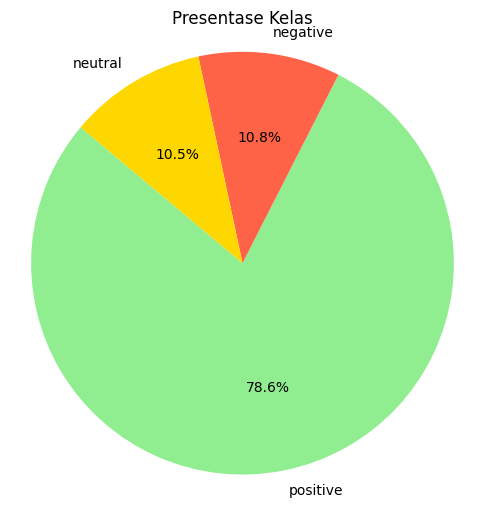

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah setiap label
label_counts = clean_df['polarity'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'tomato', 'gold'])
plt.title('Presentase Kelas')
plt.axis('equal')  # membuat pie chart berbentuk lingkaran
plt.show()

/tmp/ipython-input-21-3708142594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


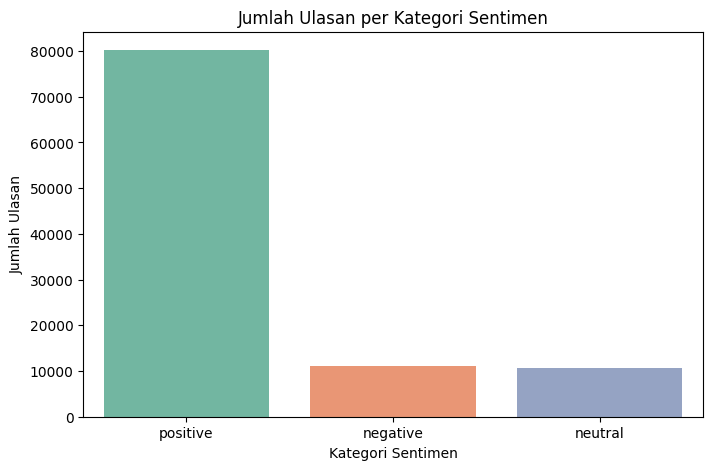

In [ ]:
# Simpan ke file jika ingin dimasukkan ke artikel
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('Jumlah Ulasan per Kategori Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.savefig('bar_chart_sentimen.png')  # Simpan ke file PNG
plt.show()


### Visualisasi Data (WordCloud)

Text(0.5, 1.0, 'WordCloud - Positive')

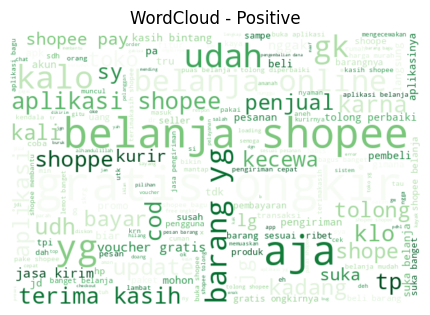

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan data berdasarkan kelas sentimen
positive_texts = clean_df[clean_df['polarity'] == 'positive']['text_akhir']
negative_texts = clean_df[clean_df['polarity'] == 'negative']['text_akhir']
neutral_texts  = clean_df[clean_df['polarity'] == 'neutral']['text_akhir']

# Gabungkan semua teks menjadi satu string untuk setiap kelas
positive_words = ' '.join(positive_texts)
negative_words = ' '.join(negative_texts)
neutral_words  = ' '.join(neutral_texts)

# Buat WordCloud
plt.figure(figsize=(18, 6))

# Positive
plt.subplot(1, 3, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_words)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive')

Text(0.5, 1.0, 'WordCloud - Negative')

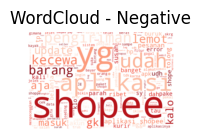

In [ ]:
# Negative
plt.subplot(1, 3, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_words)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negative')

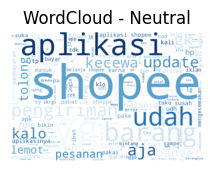

In [ ]:
# Neutral
plt.subplot(1, 3, 3)
wordcloud_neu = WordCloud(width=600, height=400, background_color='white', colormap='Blues').generate(neutral_words)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Neutral')

plt.tight_layout()
plt.show()

### Data Splitting dan Ekstraksi Fitur

Skema 1 – SVM + TF-IDF (80/20)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(clean_df['text_akhir'])
y = clean_df['polarity']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
svm_model = LinearSVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Predict on train data
y_train_pred = svm_model.predict(X_train)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Training Accuracy: 0.9724495295962368
Testing Accuracy: 0.9349764798118385
              precision    recall  f1-score   support

    negative       0.80      0.86      0.83      2230
     neutral       0.73      0.68      0.70      2213
    positive       0.98      0.98      0.98     15965

    accuracy                           0.93     20408
   macro avg       0.84      0.84      0.84     20408
weighted avg       0.93      0.93      0.93     20408



In [ ]:
import time

# Training time
start_train = time.time()
svm_model.fit(X_train, y_train)
end_train = time.time()
print("SVM Training Time:", end_train - start_train)

# Inference time
start_infer = time.time()
svm_model.predict(X_test)
end_infer = time.time()
print("SVM Inference Time:", end_infer - start_infer)

SVM Training Time: 2.028615951538086
SVM Inference Time: 0.0028591156005859375


Skema 2 – Logistic Regression + TF-IDF (80/20)

In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.10.1
!pip install gensim==4.3.1

Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.6 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 74.0 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(clean_df['text_stopword'].apply(lambda x: ' '.join(x)))

# Label Encoding
le = LabelEncoder()
y = le.fit_transform(clean_df['polarity'])

# Oversampling untuk menangani ketidakseimbangan kelas
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

# Evaluate
y_train_pred = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Logistic Regression Accuracy (Test):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78d067bd2ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

Training Accuracy: 0.9622788518476194
Logistic Regression Accuracy (Test): 0.9499688344068149
              precision    recall  f1-score   support

    negative       0.96      0.97      0.96     16106
     neutral       0.90      0.96      0.93     16197
    positive       0.99      0.93      0.96     15827

    accuracy                           0.95     48130
   macro avg       0.95      0.95      0.95     48130
weighted avg       0.95      0.95      0.95     48130



In [ ]:
# Logistic Regression
start_train = time.time()
lr_model.fit(X_train, y_train)
end_train = time.time()
print("LR Training Time:", end_train - start_train)

start_infer = time.time()
lr_model.predict(X_test)
end_infer = time.time()
print("LR Inference Time:", end_infer - start_infer)

LR Training Time: 39.627119302749634
LR Inference Time: 0.015619993209838867


## Evaluasi Model

1. Akurasi dan F1-score

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Generate classification report dictionary
report_svm = classification_report(y_test_svm, y_pred_svm, output_dict=True, target_names=le.classes_)
report_lr = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)

# Ambil macro average dari precision, recall, f1-score
svm_precision = report_svm['macro avg']['precision'] * 100
svm_recall    = report_svm['macro avg']['recall'] * 100
svm_f1        = report_svm['macro avg']['f1-score'] * 100
svm_acc       = accuracy_score(y_test_svm, y_pred_svm) * 100

lr_precision = report_lr['macro avg']['precision'] * 100
lr_recall    = report_lr['macro avg']['recall'] * 100
lr_f1        = report_lr['macro avg']['f1-score'] * 100
lr_acc       = accuracy_score(y_test, y_pred) * 100

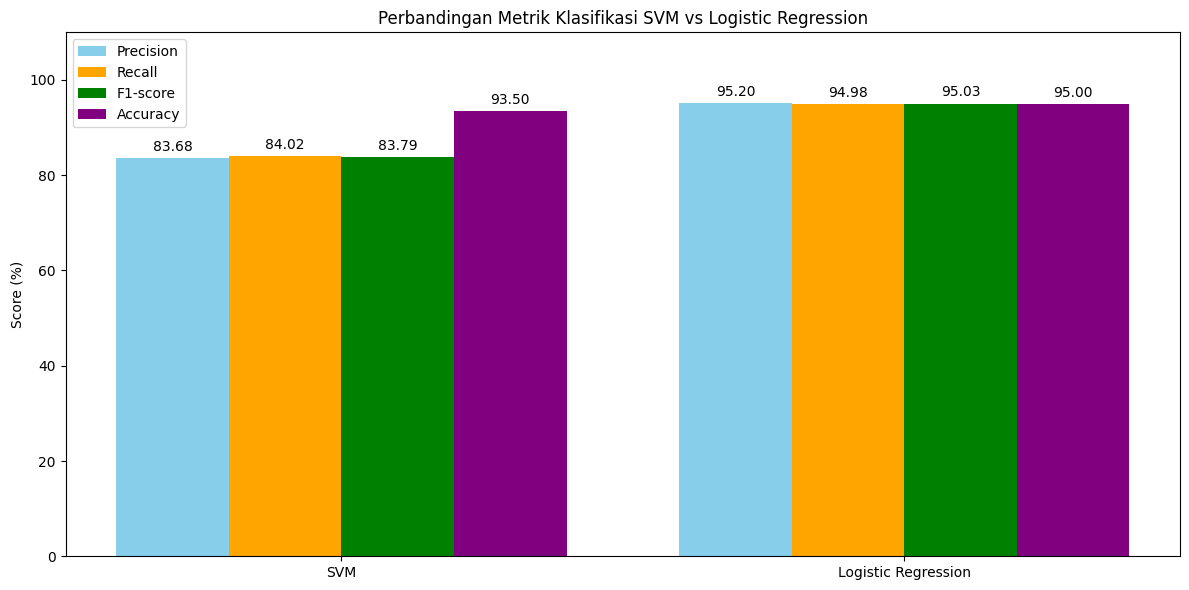

In [ ]:
# Nama model dan metrik
models = ['SVM', 'Logistic Regression']
precision = [svm_precision, lr_precision]
recall = [svm_recall, lr_recall]
f1_score = [svm_f1, lr_f1]
accuracy = [svm_acc, lr_acc]

x = np.arange(len(models))
width = 0.2  # Lebar bar

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5*width, precision, width, label='Precision', color='skyblue')
bar2 = ax.bar(x - 0.5*width, recall, width, label='Recall', color='orange')
bar3 = ax.bar(x + 0.5*width, f1_score, width, label='F1-score', color='green')
bar4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy', color='purple')

# Label dan legenda
ax.set_ylabel('Score (%)')
ax.set_title('Perbandingan Metrik Klasifikasi SVM vs Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 110)
ax.legend()

# Tambahkan label angka di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

2. Waktu Komputasi

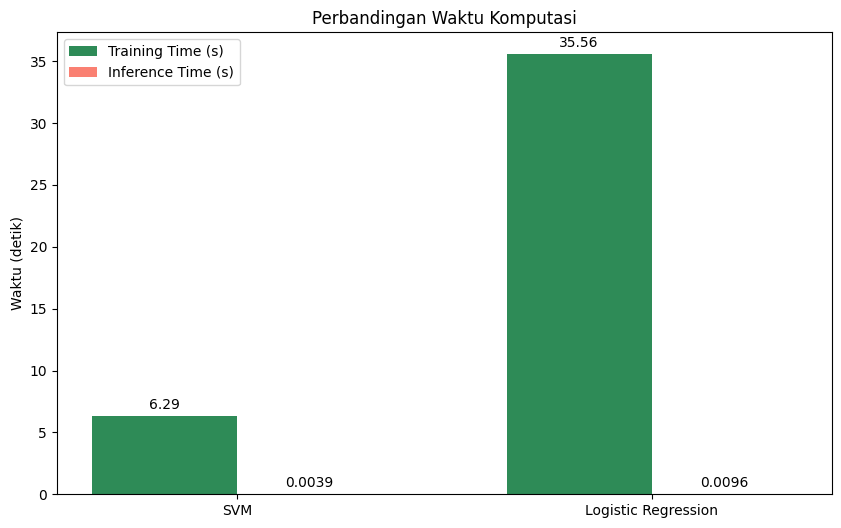

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(x - width/2, train_time, width, label='Training Time (s)', color='seagreen')
bar2 = ax.bar(x + width/2, infer_time, width, label='Inference Time (s)', color='salmon')

ax.set_ylabel('Waktu (detik)')
ax.set_title('Perbandingan Waktu Komputasi')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Tambahkan label nilai
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}' if height < 1 else f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

3. Confusion Matrix

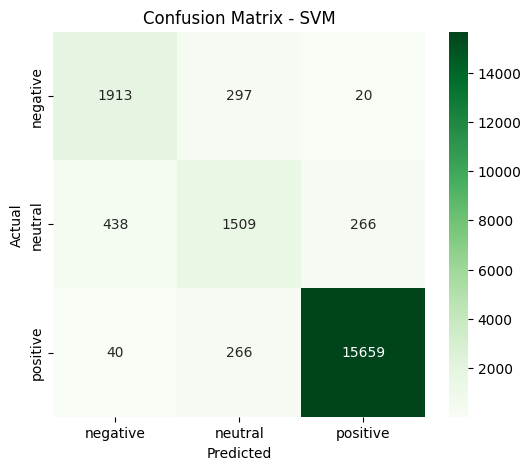

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Re-vectorize data for SVM with max_features=5000
tfidf_svm = TfidfVectorizer(max_features=5000)
X_svm = tfidf_svm.fit_transform(clean_df['text_akhir'])

# Encode labels
le = LabelEncoder()
y_svm = le.fit_transform(clean_df['polarity'])

# Split data using the same random state as before
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)


# Prediksi data test
y_pred_svm = svm_model.predict(X_test_svm)

# Buat confusion matrix
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
labels = le.classes_

# Visualisasi
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

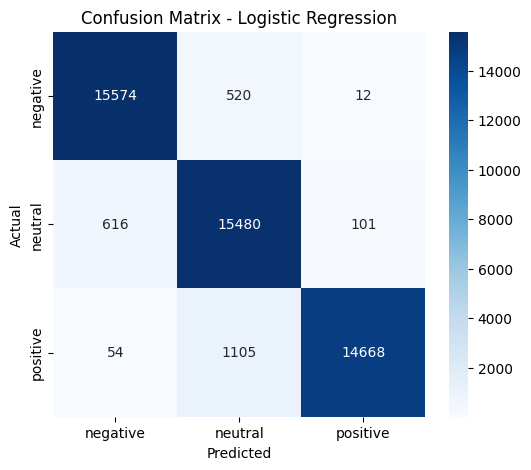

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi data test
y_pred_lr = lr_model.predict(X_test)

# Buat confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
labels = le.classes_

# Visualisasi dengan heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Simpan Model

In [ ]:
import pickle

# Simpan model
with open("lr_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

# Simpan TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Simpan LabelEncoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)